In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('exams.csv')

In [3]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [4]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
genders = df[['gender', 'writing score', 'reading score', 'math score']]

In [6]:
#split the data frame between the two genders to see if there is a difference between test scores
female = genders[genders['gender'] == 'female'].drop('gender', 1)
male = genders[genders['gender'] == 'male'].drop('gender', 1)

/var/folders/r5/4pnz2szn5fvcz9xzb4xvqfm00000gn/T/ipykernel_4676/3656120598.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  female = genders[genders['gender'] == 'female'].drop('gender', 1)
/var/folders/r5/4pnz2szn5fvcz9xzb4xvqfm00000gn/T/ipykernel_4676/3656120598.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  male = genders[genders['gender'] == 'male'].drop('gender', 1)


In [7]:
#Get the means for both groups
print('Male:')
print(male.mean())
print('Female:')
print(female.mean())

Male:
writing score    64.976378
reading score    67.387795
math score       70.750000
dtype: float64
Female:
writing score    73.439024
reading score    73.473577
math score       64.774390
dtype: float64


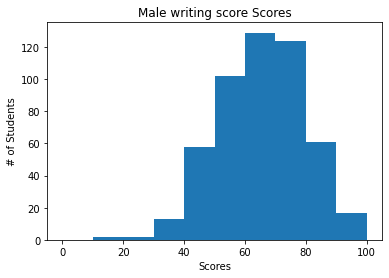

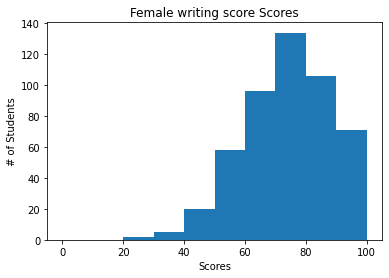

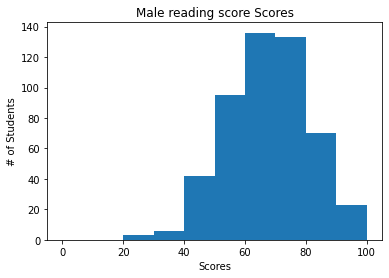

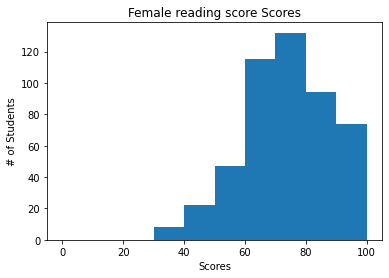

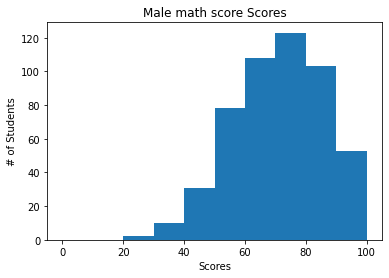

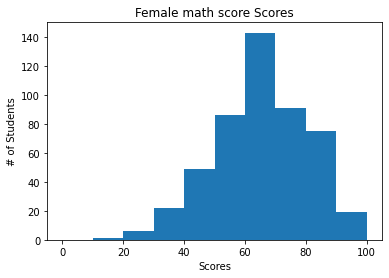

In [8]:
import matplotlib.pyplot as plt
for i in male.columns:
    plt.figure()
    plt.hist(male[i],bins=range(0,110,10), label='Male')
    plt.xlabel('Scores')
    plt.ylabel('# of Students')
    plt.title('Male {} Scores'.format(i))
    plt.figure()
    plt.hist(female[i], bins=range(0, 110, 10), label='Female')
    plt.xlabel('Scores')
    plt.ylabel('# of Students')
    plt.title('Female {} Scores'.format(i))


In [9]:
#Determine if the difference in means is statistically significant since the 
#variance and number of samples in each is different we will use a Welch T test
from scipy.stats import ttest_ind
for i in male.columns:
    t_stat,p_value = ttest_ind(male[i], female[i],equal_var=False)
    if p_value < 0.05:
        print(f"Reject null the means are not the same for: {i}")
    else:
        print(f"Don't reject Null means appear to be similar: {i}")

Reject null the means are not the same for: writing score
Reject null the means are not the same for: reading score
Reject null the means are not the same for: math score


In [10]:
def create_graphs(df1,df2,name1,name2):
    for i in df1.columns:
        plt.figure()
        plt.hist(df1[i],bins=range(0,110,10), label='{}'.format(name1))
        plt.xlabel('Scores')
        plt.ylabel('# of Students')
        plt.title('{} {} Scores'.format(name1,i))
        plt.figure()
        plt.hist(df2[i], bins=range(0, 110, 10), label='{}'.format(name2))
        plt.xlabel('Scores')
        plt.ylabel('# of Students')
        plt.title('{} {} Scores'.format(name2,i))

In [11]:
cols = df.columns
test_score_names = set([i for i in cols if i[-5:] == 'score'])
groups = set([i for i in cols if i[-5:] != 'score'])

In [12]:
races = df.drop([i for i in groups if i in groups and i != 'race/ethnicity'], axis=1)
means = races.groupby('race/ethnicity').mean()
print(means)

                math score  reading score  writing score
race/ethnicity                                          
group A          65.696203      69.202532      67.848101
group B          64.070707      68.530303      66.717172
group C          65.510836      68.609907      66.804954
group D          68.879377      70.929961      71.058366
group E          77.426573      76.615385      75.034965


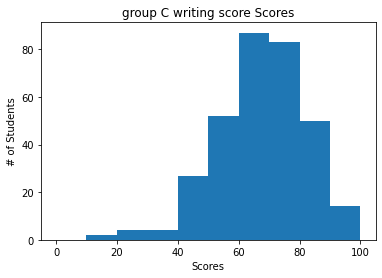

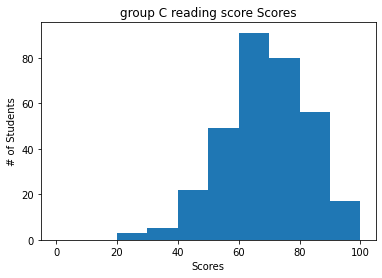

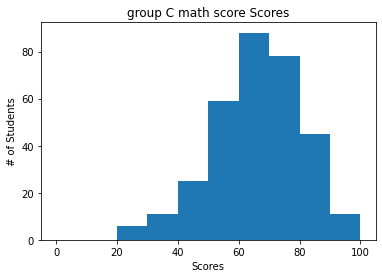

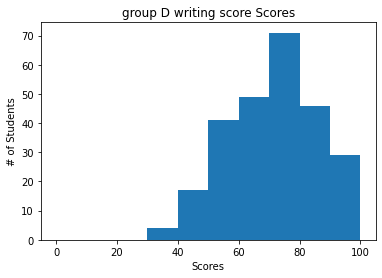

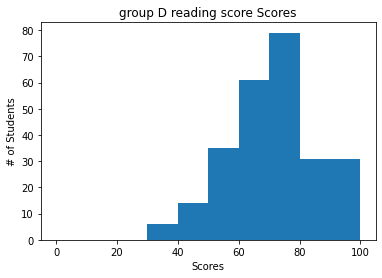

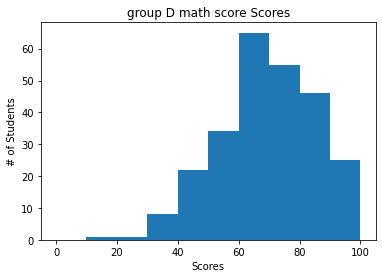

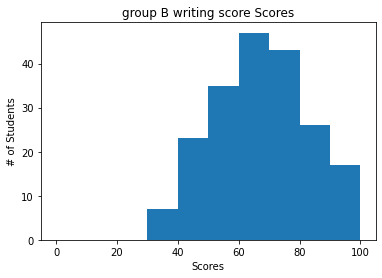

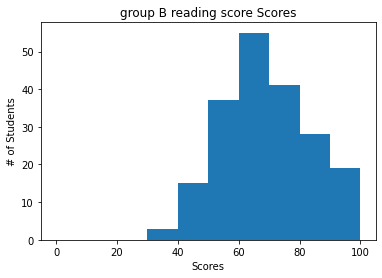

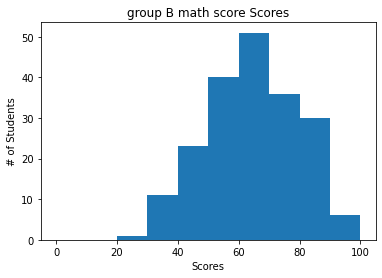

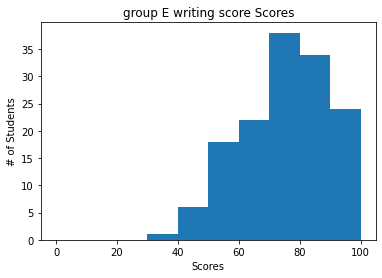

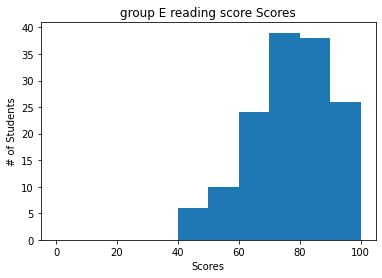

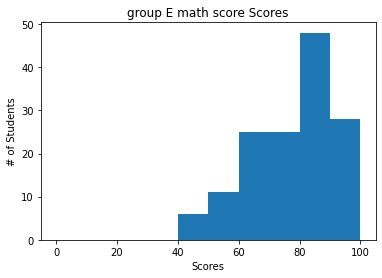

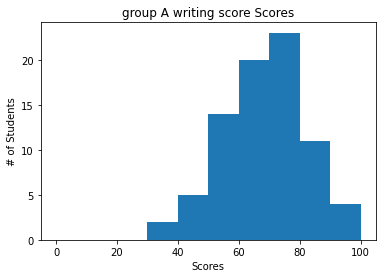

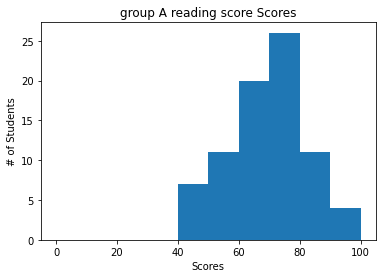

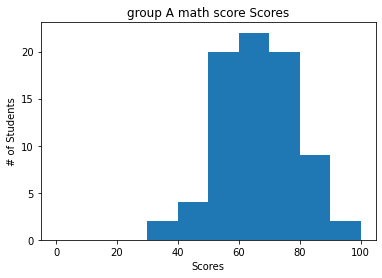

In [13]:
for i in list(races['race/ethnicity'].value_counts().index): 
    temp = races[races['race/ethnicity'] == i].drop('race/ethnicity',axis=1)
    for x in set(temp.columns):
        plt.figure()
        plt.hist(temp[x],bins=range(0,110,10))
        plt.xlabel('Scores')
        plt.ylabel('# of Students')
        plt.title('{} {} Scores'.format(i,x))

In [14]:
#Want to use anove to see if the difference between means is significant
#because the variance and size is not the same and data not exactly normal we will use 
#Krustal Anova

from scipy.stats import kruskal
import numpy as np
eth_dic = {}
eth_data = []
for i in list(races['race/ethnicity'].value_counts().index):
    eth_data.append(races[races['race/ethnicity'] == i].drop('race/ethnicity',axis=1))


for i in test_score_names:
    eth_dic[i] = []
    for x in eth_data:
        eth_dic[i].append(x[i].values)
        
     
    
#test_stat, p_value = krustal()


In [15]:
for i in eth_dic.keys():
    stat,p_value = kruskal(*eth_dic[i])
    if p_value < .05:
        print(f'reject Null at least one mean in {i} is different')
    else:
        print(f"Fail to reject Null for {i}")
    

reject Null at least one mean in writing score is different
reject Null at least one mean in reading score is different
reject Null at least one mean in math score is different


In [16]:
set(df['parental level of education'].value_counts().index)

{"associate's degree",
 "bachelor's degree",
 'high school',
 "master's degree",
 'some college',
 'some high school'}

In [17]:
parent_ed = df.drop([i for i in groups if i != 'parental level of education'], axis=1)
parent_ed

,parental level of education,math score,reading score,writing score
0,some college,59,70,78
1,associate's degree,96,93,87
2,some college,57,76,77
3,some college,70,70,63
4,associate's degree,83,85,86
...,...,...,...,...
995,some college,77,77,71
996,some college,80,66,66
997,high school,67,86,86
998,high school,80,72,62


In [18]:
means = parent_ed.groupby('parental level of education').mean()

In [19]:
means

,math score,reading score,writing score
parental level of education,,,
associate's degree,70.348039,72.647059,72.039216
bachelor's degree,69.866667,71.819048,72.266667
high school,65.381395,69.223256,66.772093
master's degree,71.026667,71.973333,71.746667
some college,68.642857,70.941964,69.473214
some high school,64.197740,66.943503,65.293785


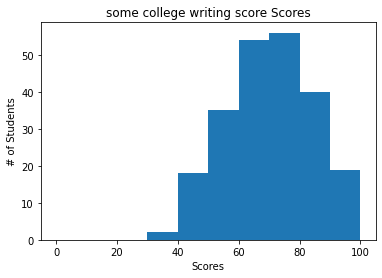

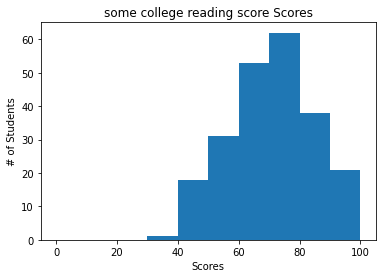

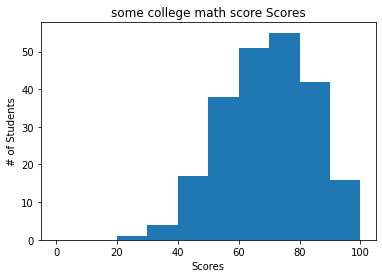

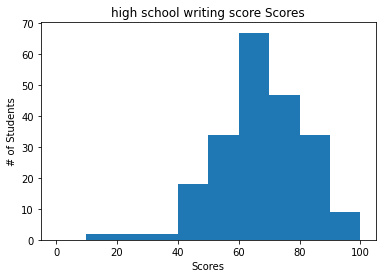

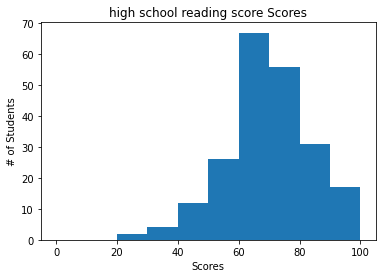

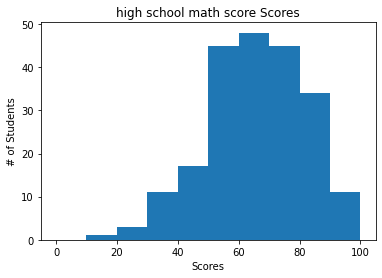

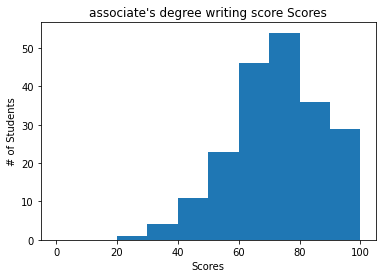

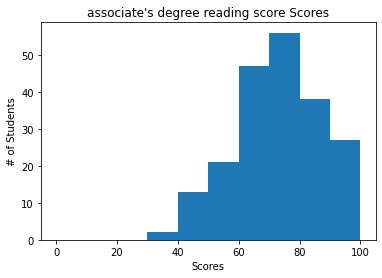

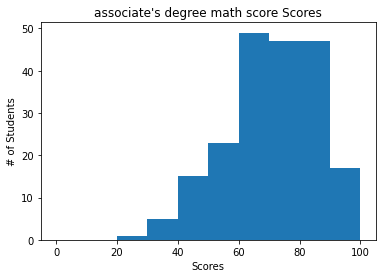

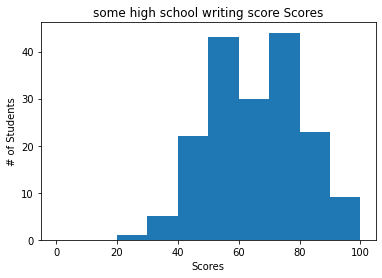

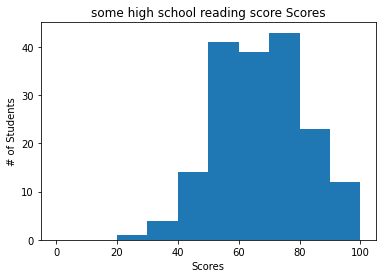

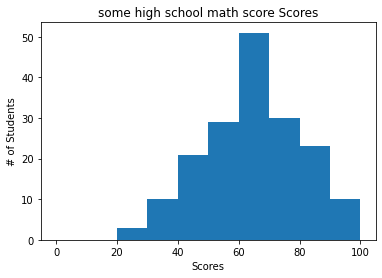

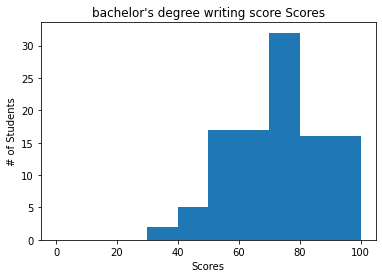

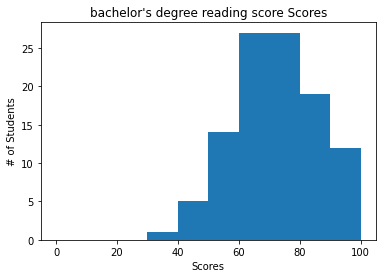

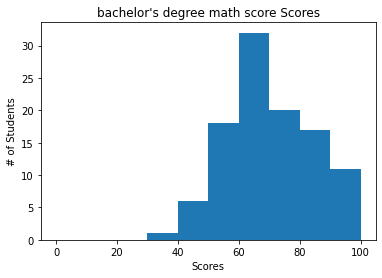

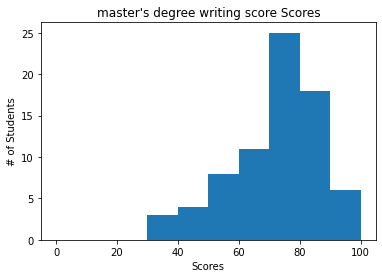

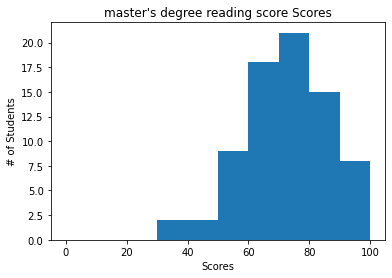

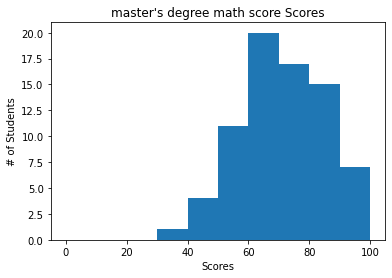

In [20]:
for i in list(parent_ed['parental level of education'].value_counts().index): 
    temp = parent_ed[parent_ed['parental level of education'] == i].drop('parental level of education',axis=1)
    for x in set(temp.columns):
        plt.figure()
        plt.hist(temp[x],bins=range(0,110,10))
        plt.xlabel('Scores')
        plt.ylabel('# of Students')
        plt.title('{} {} Scores'.format(i,x))

In [21]:
#Turn into a function

def mean_diff_sig(name, df,test_score_names=test_score_names):
    """
    Determines if the difference between the means of each group are statistically significant
    used when the data is not normally distibuted and when the variance is not the same as well
    as a different number of samples in each group
    The functions takes the following params: 
    name: name of the feature
    df: data frame
    test_score_names: already set equal to the column names of the test scores
    
    """
    data = []
    dic = {}
    #list of various types parental ed
    for i in list(df[name].value_counts().index):
        data.append(df[df[name] == i].drop(name,axis=1))
    for i in test_score_names:
        dic[i] = []
        for x in data:
            dic[i].append(x[i].values)
    
    for i in dic.keys():
        stat,p_value = kruskal(*dic[i])
        if p_value < .05:
            print(f'reject Null at least one mean in {i} is different')
        else:
            print(f"Fail to reject Null for {i}")


In [22]:
mean_diff_sig('parental level of education', parent_ed)

reject Null at least one mean in writing score is different
reject Null at least one mean in reading score is different
reject Null at least one mean in math score is different


In [23]:
def graph(df, feature):
    for i in list(df[feature].value_counts().index): 
        temp = df[df[feature] == i].drop('{}'.format(feature),axis=1)
        for x in set(temp.columns):
            plt.figure()
            plt.hist(temp[x],bins=range(0,110,10))
            plt.xlabel('Scores')
            plt.ylabel('# of Students')
            plt.title('{} {} Scores'.format(i,x))
    plt.show()

In [24]:
def new_df(feature, df=df, groups=groups):
    return df.drop([i for i in groups if i != feature], axis=1)

In [25]:
lunches = new_df('lunch')

In [26]:
lunches

,lunch,math score,reading score,writing score
0,standard,59,70,78
1,standard,96,93,87
2,free/reduced,57,76,77
3,free/reduced,70,70,63
4,standard,83,85,86
...,...,...,...,...
995,standard,77,77,71
996,standard,80,66,66
997,standard,67,86,86
998,standard,80,72,62


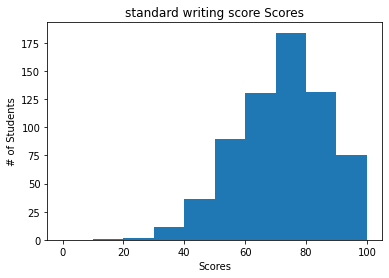

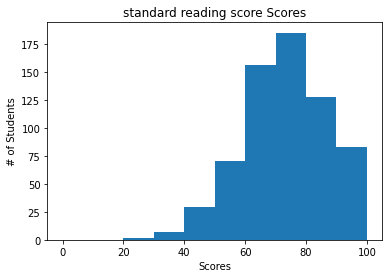

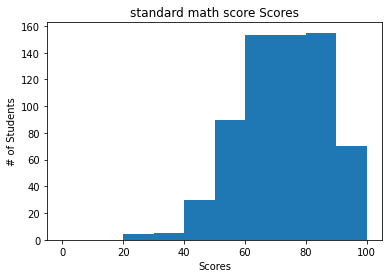

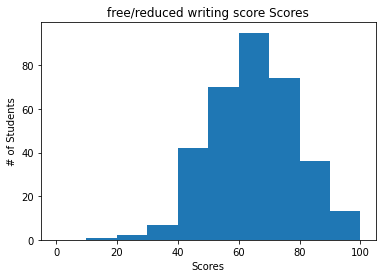

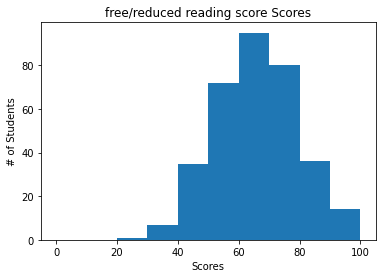

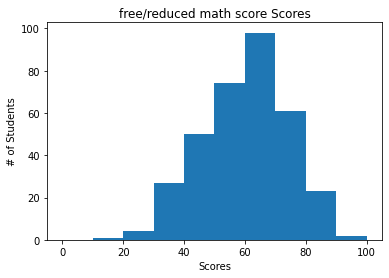

In [27]:
graph(lunches, 'lunch')

In [28]:
#could also use Mann–Whitney U test but my data seems to at least somewhat approximate normal dist
#t-test should be robutst enough and it appears highly likely just from observing the means and distribibutions
#the means are siginificantly different doing this test just as a formality
def two_means(df, feature, set1name, set2name):
    one = df[df[feature] == set1name]
    two = df[df[feature] == set2name]
    
    for i in male.columns:
        t_stat,p_value = ttest_ind(one[i], two[i],equal_var=False)
        if p_value < 0.05:
            print(f"Reject null the means are not the same for: {i}")
        else:
            print(f"Don't reject Null means appear to be similar: {i}")

In [29]:
#two_means(lunches, 'lunch', 'standard', 'free/reduced')
lunch_names = list(lunches['lunch'].value_counts().index)
two_means(lunches, 'lunch', *lunch_names)



Reject null the means are not the same for: writing score
Reject null the means are not the same for: reading score
Reject null the means are not the same for: math score


In [30]:
means = lunches.groupby('lunch').mean()
print(means)

              math score  reading score  writing score
lunch                                                 
free/reduced   59.900000      65.641176      64.235294
standard       71.884848      72.824242      71.666667


In [31]:
#prep = new_df(feature, df=df, groups=groups)
prep = new_df('test preparation course')

Help on function graph in module __main__:

graph(df, feature)



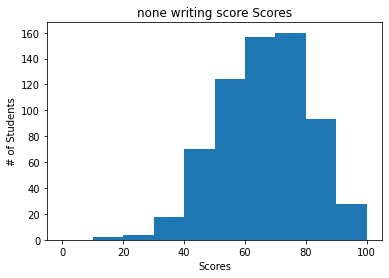

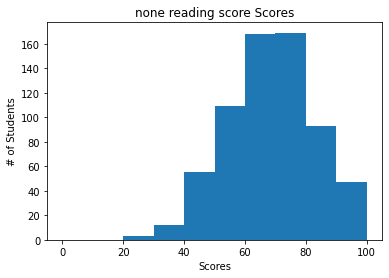

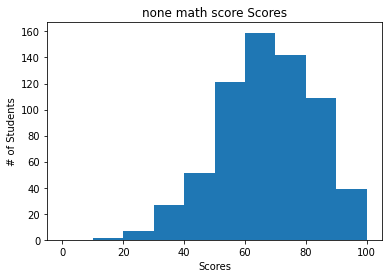

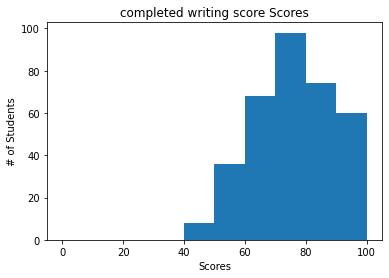

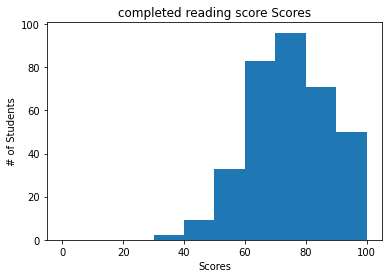

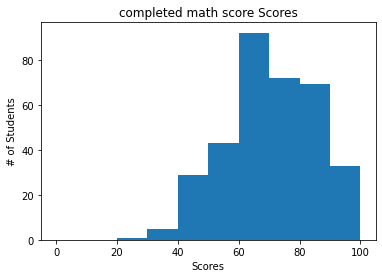

In [32]:
help(graph)
graph(prep, 'test preparation course')

In [33]:
prep_names = list(prep['test preparation course'].value_counts().index)
two_means(prep, 'test preparation course', *prep_names)

Reject null the means are not the same for: writing score
Reject null the means are not the same for: reading score
Reject null the means are not the same for: math score


In [34]:
def get_ranking(df):
    score = {}
    for i in df.index:
        sum = 0
        for x in df.columns:
            sum+= df.loc[i][x]
        score[i] = sum / len(df.columns)
    x = dict(sorted(score.items(), key=lambda x: x[1]))
    b = 1
    for i in x.keys():
        x[i] = b
        b+=1
    return x 

gender_rank = get_ranking(df.groupby('gender').mean())
eth_rank = get_ranking(df.groupby('race/ethnicity').mean())
education_rank = get_ranking(df.groupby('parental level of education').mean())
lunch_rank = get_ranking(df.groupby('lunch').mean())
prep_rank = get_ranking(df.groupby('test preparation course').mean())
#Not sure if I'm biased and associates degree is a key error and it's meant to be doctorate
#or if people who get an associates really just make more money shouldn't really effect
#test though at least for this as long as all people above masters degree
#are called associate's

In [35]:
import copy

def factorize_col(df, dic, col):
    df[col] = df[col].map(dic)
    return df

test_df = copy.deepcopy(df)

test_df = factorize_col(test_df, gender_rank, 'gender')
test_df = factorize_col(test_df, eth_rank, 'race/ethnicity')
test_df = factorize_col(test_df, education_rank, 'parental level of education')
test_df = factorize_col(test_df, lunch_rank, 'lunch')
test_df = factorize_col(test_df, prep_rank, 'test preparation course')

test_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,2,4,3,2,2,59,70,78
1,1,4,6,2,1,96,93,87
2,2,4,3,1,1,57,76,77
3,1,1,3,1,1,70,70,63
4,2,4,6,2,1,83,85,86
...,...,...,...,...,...,...,...,...
995,1,2,3,2,1,77,77,71
996,1,2,3,2,1,80,66,66
997,2,3,2,2,2,67,86,86
998,1,5,2,2,1,80,72,62


In [36]:
#df_factorized = df.assign(**{col: pd.factorize(df[col])[0] for col in df.select_dtypes(include=['object'])})

df_factorized = test_df

In [37]:
df_factorized

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,2,4,3,2,2,59,70,78
1,1,4,6,2,1,96,93,87
2,2,4,3,1,1,57,76,77
3,1,1,3,1,1,70,70,63
4,2,4,6,2,1,83,85,86
...,...,...,...,...,...,...,...,...
995,1,2,3,2,1,77,77,71
996,1,2,3,2,1,80,66,66
997,2,3,2,2,2,67,86,86
998,1,5,2,2,1,80,72,62


In [38]:
#will also try crating models for just boys and jsut girls and maybe even 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

test_score_names = [i for i in cols if i[-5:] == 'score']
groups = [i for i in cols if i[-5:] != 'score']

#param_grid = {'fit_intercept': [True,False]}

all_features = df_factorized.drop(test_score_names,axis=1)
all_labels = df_factorized.drop(groups,axis=1)

labels_dic = {}
for i in all_labels.columns:
    labels_dic[i] = all_labels[i].values

test_data_dic = {}
trained_models = {}
real_test_vals = {}
for i in labels_dic.keys():  
    X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels[i], test_size=0.2, random_state=42)
    test_data_dic[i] = X_test
    real_test_vals[i] = y_test.values
    linearRegModel1 = LinearRegression()
# Define the parameter grid to search over
    #grid_search = GridSearchCV(linearRegModel1, param_grid, cv=5)
    linearRegModel1.fit(X_train, y_train)
    trained_models[i] = linearRegModel1
    #print("Best parameters:", grid_search.best_params_)
    #print("Best MSE:", -grid_search.best_score_)

predictions = {}

for i in trained_models.keys():
    y_pred = trained_models[i].predict(test_data_dic[i])
    predictions[i] = y_pred
    score = r2_score(real_test_vals[i], y_pred)
    print(f"R squared score for {i} using Linear regression is: {score}")
#print(predictions)


R squared score for math score using Linear regression is: 0.3141467260607502
R squared score for reading score using Linear regression is: 0.16393925184590552
R squared score for writing score using Linear regression is: 0.27253036330239433


In [39]:
print(i)
print(predictions[i][:10])
real_test_vals[i][:10]

writing score
[70.37019194 74.83972013 75.15297661 52.86538026 66.00835344 53.27906887
 65.59466483 66.48428219 64.60461533 79.21356676]


array([70, 80, 58, 66, 78, 51, 71, 28, 75, 88])

## Not suprising that a linear regression model can not accuratley predict the test scores this job seems more fit for a decision tree although we will calculate how correlated each feature is with one another and then make a decision tree and possibly even a polynomial regression model

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
test_data_dic = {}
trained_models = {}
real_test_vals = {}
poly = PolynomialFeatures(degree=3)
for i in labels_dic.keys():  
    X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels[i], test_size=0.2, random_state=42)
    poly.fit(X_train)
    test_data_dic[i] = X_test
    real_test_vals[i] = y_test.values
    linearRegModel1 = LinearRegression()
# Define the parameter grid to search over
    #grid_search = GridSearchCV(linearRegModel1, param_grid, cv=5)
    X_train = poly.fit_transform(X_train)
    linearRegModel1.fit(X_train, y_train)
    trained_models[i] = linearRegModel1
    #print("Best parameters:", grid_search.best_params_)
    #print("Best MSE:", -grid_search.best_score_)

predictions = {}

for i in trained_models.keys():
    poly.fit(test_data_dic[i])
    X_train = poly.fit_transform(test_data_dic[i])
    y_pred = trained_models[i].predict(X_train)
    predictions[i] = y_pred
    score = r2_score(real_test_vals[i], y_pred)
    print(f"R squared score for {i} using Linear regression is: {score}")

R squared score for math score using Linear regression is: 0.28208896597226696
R squared score for reading score using Linear regression is: 0.1229820809690384
R squared score for writing score using Linear regression is: 0.22051465652380786


## Ploynomial regression is only slightly better but not enough to right home about as suspected a decision tree and or a random forrest is the way to go for this type of data

In [42]:
df_factorized.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.043976,-0.010968,-0.015708,0.032641,-0.195992,0.215775,0.281707
race/ethnicity,-0.043976,1.000000,-0.011359,0.039927,0.034311,0.248956,0.165580,0.187396
parental level of education,-0.010968,-0.011359,1.000000,-0.020079,0.001786,0.151615,0.131120,0.165711
lunch,-0.015708,0.039927,-0.020079,1.000000,-0.093498,0.372465,0.241319,0.234400
test preparation course,0.032641,0.034311,0.001786,-0.093498,1.000000,0.119925,0.223132,0.321520
math score,-0.195992,0.248956,0.151615,0.372465,0.119925,1.000000,0.811767,0.790055
reading score,0.215775,0.165580,0.131120,0.241319,0.223132,0.811767,1.000000,0.948909
writing score,0.281707,0.187396,0.165711,0.234400,0.321520,0.790055,0.948909,1.000000


# Making a Decision Tree Regressor 

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
#model = DecisionTreeRegressor(max_depth=15, random_state=42)

In [44]:
#all_features = df_factorized.drop(test_score_names,axis=1)
#all_labels = df_factorized.drop(groups,axis=1)

#Picking the best model we will assume the best model for 
#predicting one test score will be the same for all but since
#out data isn't overwhelmingly huge I may revice this is in the future and 
#get see if the depth changes 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
'''
param_grid = {'max_depth': [i for i in range(3,15,2)],
              'min_samples_split': [i/10 for i in range(2,12,2)],
              'min_samples_leaf': [i/10 for i in range(2,12,2)],
              'criterion': ['mse', 'friedman_mse', 'mae'],
              'splitter': ['best', 'random'],
              'max_features': ['auto', 'sqrt', 'log2']}
'''
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10,12,14],
              'min_samples_leaf': [1, 2, 4, 6, 8, 10,12,14],
              'criterion': ['mse', 'friedman_mse', 'mae'],
              'splitter': ['best', 'random'],
              'max_features': ['auto', 'sqrt', 'log2']}
dt_reg = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(dt_reg, param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels['math score'], test_size=0.2, random_state=42)
grid_search.fit(X_train,y_train)

best_dt_reg = grid_search.best_estimator_

best_dt_reg

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
                      max_features='auto', min_samples_leaf=12, random_state=42,
                      splitter='random')

In [45]:
best_params = best_dt_reg.get_params()
dt_reg = DecisionTreeRegressor(**best_params)

dt_reg.fit(X_train,y_train)
preds = dt_reg.predict(X_test)
score = dt_reg.score(X_test, y_test)
print(f"R-squared score on testing data: {score}")


R-squared score on testing data: 0.2495279500585883


In [46]:
print(preds[:10])
print()
print(y_test[:10].values)

[71.57894737 78.43103448 63.72       58.14285714 80.83333333 59.16666667
 72.75       50.4        80.83333333 77.15384615]

[67 78 39 70 90 51 76 28 94 85]


In [47]:
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters to search over
param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a random forest regressor
rf = RandomForestRegressor()

# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

forrest_params = grid_search.best_params_


Best hyperparameters: {'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [62]:
#Visulize the decision tree
'''
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_reg, out_file=None, 
                           feature_names=X_test.columns.tolist(), 
                           filled=True, rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph
'''
rf

RandomForestRegressor()

In [67]:
rf = RandomForestRegressor(**forrest_params)
rf.fit(X_train, y_train)


RandomForestRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='sqrt', n_estimators=200)

In [69]:
#random forrest gives by far the best results still not great but much better
results = rf.predict(X_test)
r_squared = r2_score(y_test, results)

print('R-squared: {:.4f}'.format(r_squared))

R-squared: 0.3050


In [70]:
#Will try and get the total score from all three test scores as a percentage 
#and then we will try and get a prediction
#can then try and classify by either A,B,C,D,F 
#corresponding to: 90-100,80-89,70-79,60-69,0-59

In [86]:
df['total'] = df[test_score_names].sum(axis=1)/300

In [87]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,0.690000
1,male,group D,associate's degree,standard,none,96,93,87,0.920000
2,female,group D,some college,free/reduced,none,57,76,77,0.700000
3,male,group B,some college,free/reduced,none,70,70,63,0.676667
4,female,group D,associate's degree,standard,none,83,85,86,0.846667
...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71,0.750000
996,male,group C,some college,standard,none,80,66,66,0.706667
997,female,group A,high school,standard,completed,67,86,86,0.796667
998,male,group E,high school,standard,none,80,72,62,0.713333


In [95]:
score_bins = [0, .59, .69, .79, .89, 1]
grade_labels = ['F', 'D', 'C', 'B', 'A']
# use pd.cut to convert the scores to grades
df['Grade'] = pd.cut(df['total'], bins=score_bins, labels=grade_labels, include_lowest=True)

In [96]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,Grade
0,female,group D,some college,standard,completed,59,70,78,0.690000,D
1,male,group D,associate's degree,standard,none,96,93,87,0.920000,A
2,female,group D,some college,free/reduced,none,57,76,77,0.700000,C
3,male,group B,some college,free/reduced,none,70,70,63,0.676667,D
4,female,group D,associate's degree,standard,none,83,85,86,0.846667,B
...,...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71,0.750000,C
996,male,group C,some college,standard,none,80,66,66,0.706667,C
997,female,group A,high school,standard,completed,67,86,86,0.796667,B
998,male,group E,high school,standard,none,80,72,62,0.713333,C


In [120]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [123]:
#test_score_names
#groups
X_train, X_test, y_train, y_test = train_test_split(all_features, df['Grade'], test_size=0.2, random_state=42)

In [124]:
# Define the hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a random forest regressor

# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

forrest_params = grid_search.best_params_

Best hyperparameters: {'bootstrap': True, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [125]:
rf = RandomForestClassifier(**forrest_params)

In [127]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=5, max_features='log2',
                       min_samples_leaf=2, min_samples_split=10)

In [135]:
y_pred = rf.predict(X_test)

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [139]:
y_pred

array(['C', 'C', 'C', 'F', 'B', 'F', 'C', 'F', 'B', 'B', 'D', 'F', 'D',
       'C', 'F', 'C', 'F', 'C', 'D', 'F', 'B', 'F', 'C', 'A', 'D', 'C',
       'C', 'D', 'C', 'C', 'F', 'D', 'C', 'C', 'D', 'D', 'B', 'D', 'D',
       'F', 'C', 'A', 'A', 'C', 'C', 'B', 'F', 'C', 'D', 'D', 'B', 'C',
       'F', 'C', 'C', 'C', 'C', 'F', 'C', 'D', 'F', 'D', 'C', 'D', 'D',
       'C', 'D', 'A', 'D', 'C', 'D', 'F', 'F', 'F', 'C', 'C', 'D', 'B',
       'A', 'D', 'F', 'F', 'D', 'F', 'C', 'B', 'B', 'F', 'F', 'F', 'C',
       'F', 'D', 'D', 'C', 'C', 'D', 'F', 'C', 'F', 'C', 'D', 'D', 'F',
       'F', 'F', 'F', 'C', 'C', 'C', 'C', 'C', 'F', 'F', 'A', 'C', 'F',
       'D', 'D', 'D', 'B', 'F', 'C', 'F', 'F', 'C', 'F', 'F', 'F', 'F',
       'C', 'B', 'F', 'C', 'B', 'C', 'C', 'C', 'F', 'C', 'D', 'D', 'C',
       'F', 'B', 'D', 'C', 'D', 'D', 'D', 'B', 'C', 'F', 'C', 'B', 'D',
       'C', 'B', 'C', 'F', 'C', 'F', 'D', 'C', 'C', 'B', 'D', 'C', 'F',
       'C', 'D', 'C', 'F', 'A', 'C', 'B', 'D', 'C', 'F', 'C', 'C